## Assignment No: 8
## Name: Nghia Lam
## UTA ID: 1001699317

## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using a clean and modified version of the auto imports dataset (Description of the original dataset is in the cell bellow). Download the auto_imp.csv file from Canvas and put it in your working directory. Don't forget to add libraries to use in your analysis. You can use the code as a guide that was provided in the class. 

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

Submission: Run all your code cells and export the file as HTML. Submit a zip of your .ipynb file and HTML file. Add your name and UTA ID in the markdown cell above.

Good luck!



**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

## Your answer
For me personally a problem that needs to have better classification is probably spam or scam calls. I get it way too much. At least twice to three times a day I would get a call that is either a spam or a scam call. There needs to be better classifications on that so the problem does not get worse.

# 2. Preprocessing

In [5]:
## Add libraries to use
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
#from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from numpy import mean
import pandas as pd

In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imp.csv' from Canvas. Follow the prompts to complete the homework.**

In [6]:
df2 =pd.read_csv('auto_imp.csv')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    int64  
 11  peak_rpm     195 non-null    int64  
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 23.0+ KB


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [8]:
#Your code
df2=pd.get_dummies(df2, columns=['fuel_type'],drop_first=True, dtype=np.uint8)

In [9]:
df2

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845,1
191,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045,1
192,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485,1
193,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470,0


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [10]:
#your code
y = df2['fuel_type_gas']
X = df2.drop(columns=['fuel_type_gas'])


## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [11]:
#your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (136, 14)
X_test shape: (59, 14)
y_train shape: (136,)
y_test shape: (59,)


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [12]:
#your code
logisticRegr = LogisticRegression(max_iter=1000, random_state=746)
logisticRegr.fit(X_train, y_train)
y_prediction = logisticRegr.predict(X_test)

confMatrix = confusion_matrix(y_test,y_prediction)
print("Confusion Matrix:\n", confMatrix)

classReport = classification_report(y_test, y_prediction)
print("Classification Report:\n", classReport)

y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)


Confusion Matrix:
 [[ 9  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        50

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC: 1.0


### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [13]:
#your code
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 9  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        50

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Accuracy: 1.0


### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC. What do you notice?

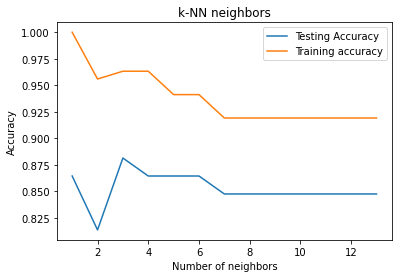

Confusion Matrix:
 [[ 3  6]
 [ 1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.89      0.98      0.93        50

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59



0.7255555555555555

In [15]:
#your code
neighbors = np.arange(1,14)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train,y_train)

    train_acc[i] = knn.score(X_train,y_train)

    test_acc[i] = knn.score(X_test,y_test)

plt.title('k-NN neighbors')
plt.plot(neighbors, test_acc, label='Testing Accuracy')
plt.plot(neighbors, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred = knn.predict(X_test)
confMatrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", confMatrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

y_pred_proba = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_proba)


### 3.4 Compare and contrast the three classification methods. Which one would you choose and why?

You can use Naive Bayes or Logistic as they produce the same values of 100 percent. 
I would choose Naive Bayes because I have done it before and it gives 100 percent for accuracy.